In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Step 1: Read the CSV file
print("Step 1: Reading the dataset...")
df = pd.read_csv('Mobile_Price_Classification-220531-204702.csv')

Step 1: Reading the dataset...


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset info:")
print(df.info())
print(f"\nPrice range distribution:")
print(df['price_range'].value_counts())

Dataset shape: (2000, 21)

First few rows:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15

In [4]:
# Step 2: Prepare the data
print("\nStep 2: Preparing the data...")


Step 2: Preparing the data...


In [5]:
# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

In [6]:
# For binary classification, Convert multi-class to binary
# 0,1 -> 0 (low), 2,3 -> 1 (high)
y_binary = (y >= 2).astype(int)

In [7]:
print(f"\nBinary price distribution:")
print(f"Low (0): {sum(y_binary == 0)}")
print(f"High (1): {sum(y_binary == 1)}")


Binary price distribution:
Low (0): 2000
High (1): 0


In [8]:
# Split the data: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.25, random_state=42, stratify=y_binary
)

In [9]:
print(f"\nTraining set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")


Training set size: 1500 (75.0%)
Testing set size: 500 (25.0%)


In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Step 3: Build the ANN model
print("\nStep 3: Building the ANN model...")


Step 3: Building the ANN model...


In [12]:
model = Sequential([
    # Input layer (automatically inferred from input shape)
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],), name='hidden_layer_1'),

    # Second hidden layer with 4 neurons
    Dense(4, activation='relu', name='hidden_layer_2'),

    # Output layer (binary classification)
    Dense(1, activation='sigmoid', name='output_layer')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
print("\nModel Architecture:")
model.summary()


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Step 4: Compile the model
print("\nStep 4: Compiling the model...")


Step 4: Compiling the model...


In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
print("Model compiled successfully!")

Model compiled successfully!


In [17]:
# Step 5: Train the model
print("\nStep 5: Training the model...")
print("Training for 100 epochs with batch size of 32...")


Step 5: Training the model...
Training for 100 epochs with batch size of 32...


In [18]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8530 - loss: 0.4830 - val_accuracy: 0.9300 - val_loss: 0.3660
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9518 - loss: 0.3448 - val_accuracy: 0.9833 - val_loss: 0.2637
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9920 - loss: 0.2427 - val_accuracy: 0.9967 - val_loss: 0.1916
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1742 - val_accuracy: 1.0000 - val_loss: 0.1398
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.1264 - val_accuracy: 1.0000 - val_loss: 0.1027
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0954 - val_accuracy: 1.0000 - val_loss: 0.0762
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0662 - val_accuracy: 1.0000 - val_loss: 0.0582
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0465 - val_accuracy: 1.00

In [19]:
# Evaluate the model
print("\nEvaluating the model on test data...")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Evaluating the model on test data...
Test Loss: 0.0001
Test Accuracy: 1.0000 (100.00%)


In [22]:
# Step 6: Save the weights
print("\nStep 6: Saving the model weights...")
model.save_weights('mobile_price_model_.weights.h5')
print("Weights saved successfully as 'mobile_price_model_.weights.h5'")


Step 6: Saving the model weights...
Weights saved successfully as 'mobile_price_model_.weights.h5'


In [23]:
# Also save the entire model for easier loading later
model.save('mobile_price_model.h5')
print("Complete model saved as 'mobile_price_model.h5'")

Complete model saved as 'mobile_price_model.h5'


In [24]:
# Save the scaler for future predictions
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


In [25]:
# Plot training history
print("\nGenerating training history plots...")


Generating training history plots...


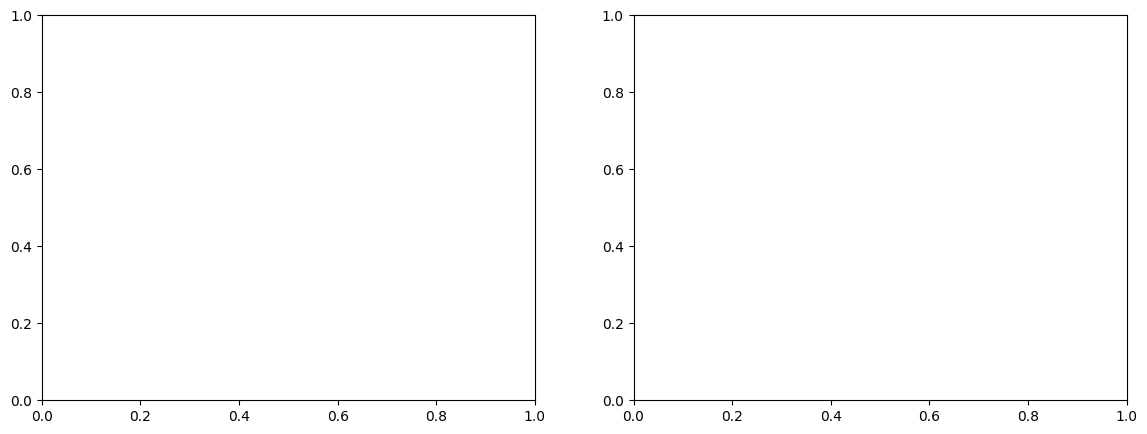

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

In [27]:
# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

In [28]:
# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

In [29]:
plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
print("Training history plots saved as 'training_history.png'")
plt.show()

Training history plots saved as 'training_history.png'


<Figure size 640x480 with 0 Axes>

In [30]:
# Make some sample predictions
print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)



SAMPLE PREDICTIONS


In [31]:
# Test with a few samples from the test set
sample_indices = np.random.choice(len(X_test), 5, replace=False)
samples = X_test_scaled[sample_indices]
predictions = model.predict(samples, verbose=0)
predicted_classes = (predictions > 0.5).astype(int).flatten()
actual_classes = y_test.iloc[sample_indices].values

In [32]:
print("\nSample predictions vs actual:")
for i, (pred_prob, pred_class, actual) in enumerate(zip(predictions, predicted_classes, actual_classes)):
    print(f"Sample {i+1}: Predicted = {pred_class} (prob: {pred_prob[0]:.4f}), Actual = {actual}")


Sample predictions vs actual:
Sample 1: Predicted = 0 (prob: 0.0004), Actual = 0
Sample 2: Predicted = 0 (prob: 0.0000), Actual = 0
Sample 3: Predicted = 0 (prob: 0.0001), Actual = 0
Sample 4: Predicted = 0 (prob: 0.0000), Actual = 0
Sample 5: Predicted = 0 (prob: 0.0008), Actual = 0


In [33]:
print("\n" + "="*60)
print("TRAINING COMPLETE!")
print("="*60)
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nFiles saved:")
print("  - mobile_price_model_weights.h5 (model weights)")
print("  - mobile_price_model.h5 (complete model)")
print("  - scaler.pkl (feature scaler)")
print("  - training_history.png (training plots)")


TRAINING COMPLETE!
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Test Accuracy: 1.0000

Files saved:
  - mobile_price_model_weights.h5 (model weights)
  - mobile_price_model.h5 (complete model)
  - scaler.pkl (feature scaler)
  - training_history.png (training plots)
